# Regression analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Fetching Eurostoxx 50 data

In [2]:
import shutil
import urllib.request

es_url = "http://www.stoxx.com/download/historical_values/hbrbcpe.txt"
vs_url = "http://www.stoxx.com/download/historical_values/h_vstoxx.txt"

raw_es_filename = "data/raw_es50.txt"
raw_vs_filename = "data/raw_vs50.txt"

urls = (es_url, vs_url)
filenames = (raw_es_filename, raw_vs_filename)

for i in range(2):
    with urllib.request.urlopen(urls[i]) as response:
        with open(filenames[i], "wb") as file:
            shutil.copyfileobj(response, file)


In [3]:
lines = open(filenames[0], "r").readlines()
lines[:6]

['Price Indices - EURO Currency\n',
 'Date    ;Blue-Chip;Blue-Chip;Broad    ; Broad   ;Ex UK    ;Ex Euro Zone;Blue-Chip; Broad\n',
 '        ;  Europe ;Euro-Zone;Europe   ;Euro-Zone;         ;            ; Nordic  ; Nordic\n',
 '        ;  SX5P   ;  SX5E   ;SXXP     ;SXXE     ; SXXF    ;    SXXA    ;    DK5F ; DKXF\n',
 '31.12.1986;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56\n',
 '01.01.1987;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56\n']

In [4]:
lines = [line.replace(" ", "") for line in lines]
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [5]:
es_filename = "data/res50.txt"
with open(es_filename, "w") as file:
    file.writelines("Date" + lines[3])
    file.writelines(lines[4:3886])
    for i in range(3886, len(lines)):
        file.writelines(lines[i][:-2] + lines[i][-1])


In [6]:
import pprint

pp = pprint.PrettyPrinter(indent=0, width=40, compact=True)

with open(es_filename, "r") as file:
    pp.pprint(file.readlines()[3881:3889])

['21.12.2001;3616.80;3696.44;291.39;306.60;322.55;272.18;5360.52;370.94\n',
'24.12.2001;3622.85;3696.98;291.90;306.77;322.69;272.95;5360.52;370.94\n',
'27.12.2001;3686.23;3778.39;297.11;312.43;327.57;277.68;5479.59;378.69\n',
'28.12.2001;3706.93;3806.13;298.73;314.52;329.94;278.87;5585.35;386.99\n',
'02.01.2002;3627.81;3755.56;293.69;311.43;326.77;272.38;5522.25;380.09\n',
'03.01.2002;3699.09;3833.09;299.09;317.54;332.62;277.08;5722.57;396.12\n',
'04.01.2002;3702.66;3820.42;300.57;317.45;332.91;279.80;5752.12;397.50\n',
'07.01.2002;3657.63;3754.42;297.77;313.33;329.58;278.12;5742.73;395.17\n']


In [7]:
es = pd.read_csv(es_filename, sep=";", index_col=0, parse_dates=True, dayfirst=True)
es

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Date,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06
...,...,...,...,...,...,...,...,...
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26


In [8]:
vs = pd.read_csv(filenames[1], header=2, index_col=0, parse_dates=True, dayfirst=True, sep=",")
vs

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
1999-01-04,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
1999-01-05,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
1999-01-06,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
1999-01-07,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
1999-01-08,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672
...,...,...,...,...,...,...,...,...,...
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533


In [9]:
import datetime

start_date = datetime.datetime(1999, 1, 1)
end_date = datetime.datetime(2016, 2, 12)
filtered_es = pd.DataFrame({"EUROSTOXX" : es["SX5E"][(es.index > start_date) & (es.index < end_date)]})
filtered_vs = pd.DataFrame({"VSTOXX" : vs["V2TX"][(vs.index > start_date) & (vs.index < end_date)]})

In [10]:
data = filtered_es.join(filtered_vs)
data

,EUROSTOXX,VSTOXX
Date,,
1999-01-04,3543.10,18.2033
1999-01-05,3604.67,29.6912
1999-01-06,3685.36,25.1670
1999-01-07,3627.87,32.5205
1999-01-08,3616.57,33.2296
...,...,...
2016-02-05,2879.39,30.0529
2016-02-08,2785.17,33.3917
2016-02-09,2736.50,33.9664


In [11]:
missing_indices = data[data.isna().any(axis=1)].index.values
data = data.fillna(method="ffill")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4386 entries, 1999-01-04 to 2016-02-11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUROSTOXX  4386 non-null   float64
 1   VSTOXX     4386 non-null   float64
dtypes: float64(2)
memory usage: 262.8 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

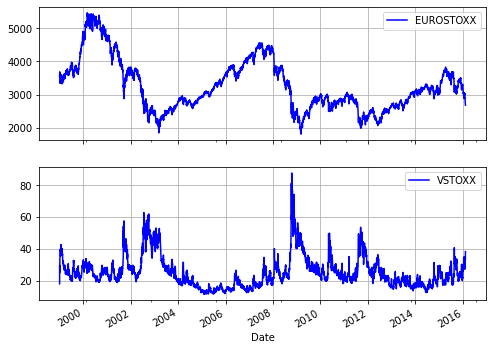

In [13]:
%matplotlib inline

data.plot(subplots=True, grid=True, style="b", figsize=(8, 6))

In [14]:
rets = np.log(data / data.shift(1))
rets

,EUROSTOXX,VSTOXX
Date,,
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570
...,...,...
2016-02-05,-0.008958,0.013757
2016-02-08,-0.033270,0.105348
2016-02-09,-0.017629,0.017064


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

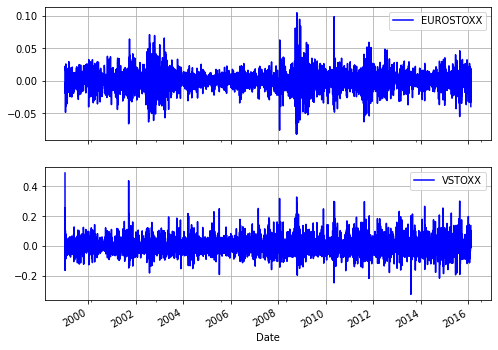

In [15]:
rets.plot(subplots=True, grid=True, style="b", figsize=(8, 6))

In [16]:
import statsmodels.api as sm

X = rets.EUROSTOXX
y = rets.VSTOXX
X = sm.add_constant(X)
model = sm.OLS(y, X, missing="drop")
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VSTOXX   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     5208.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:21:28   Log-Likelihood:                 7964.0
No. Observations:                4385   AIC:                        -1.592e+04
Df Residuals:                    4383   BIC:                        -1.591e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.147e-05      0.001     -0.019      0.985      -0.001       0.001
EUROSTOXX     -2.8463      0.039    -72.164      0.000      -2.924      -2.769
==============================================================================
Omnibus:                     1315.684   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24606.871
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                      14.448   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.736878
VSTOXX,-0.736878,1.000000


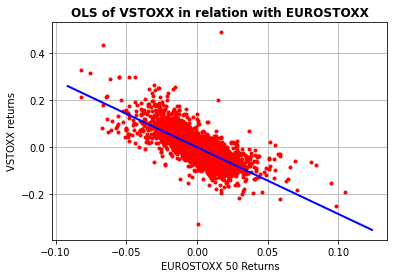

In [18]:
import matplotlib.pyplot as plt

plt.plot(rets.EUROSTOXX, rets.VSTOXX, "r.")
ax = plt.axis()
x = np.linspace(ax[0], ax[1]+ 0.01)
plt.plot(x, results.params[0] + x * results.params[1], "b", lw=2)
plt.grid(True)
plt.title("OLS of VSTOXX in relation with EUROSTOXX", fontdict={"weight": "bold"})
plt.axis("tight")
plt.xlabel("EUROSTOXX 50 Returns")
plt.ylabel("VSTOXX returns")
plt.show()

# High-Frequency data

In [20]:
list_stocks = ["HMb.ST", "NOKI.ST", "VOLVb.ST"]
fname = "NORDIC_TS_20090712-2009-07-"

Data = pd.DataFrame()

for stocks in list_stocks:
    Temp = pd.read_csv("data/{}{}.csv".format(fname, stocks)).reset_index()
    Data=Data.append(Temp, ignore_index=True)

In [21]:
Data["Type"].value_counts()

Quote    1081336
Trade     155672
Name: Type, dtype: int64

In [22]:
import datetime as dt

def mergedate(x):
    return dt.datetime.strptime(x, "%Y%m%d%H:%M:%S.%f")
    
Data["DateS"] = Data["Date[G]"].map(str) + Data["Time[G]"]
Data["DT"] = Data["DateS"].map(mergedate)
Data["TS"] = Data["DT"].map(pd.Timestamp)



In [23]:
Data

,index,#RIC,Date[G],Time[G],GMT Offset,Type,Ex/Cntrb.ID,Price,Volume,Buyer ID,...,No. Buyers,Seller ID,Ask Price,Ask Size,No. Sellers,Qualifiers,Exch Time,DateS,DT,TS
0,0,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009070106:44:59.598514,2009-07-01 06:44:59.598514,2009-07-01 06:44:59.598514
1,1,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,385.00,3868.0,NaN,NaN,NaN,2009070106:44:59.598514,2009-07-01 06:44:59.598514,2009-07-01 06:44:59.598514
2,2,HMb.ST,20090701,06:49:43.089521,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3888.0,NaN,NaN,NaN,2009070106:49:43.089521,2009-07-01 06:49:43.089521,2009-07-01 06:49:43.089521
3,3,HMb.ST,20090701,06:50:27.336043,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4938.0,NaN,NaN,NaN,2009070106:50:27.336043,2009-07-01 06:50:27.336043,2009-07-01 06:50:27.336043
4,4,HMb.ST,20090701,06:50:28.333304,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4688.0,NaN,NaN,NaN,2009070106:50:28.333304,2009-07-01 06:50:28.333304,2009-07-01 06:50:28.333304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237003,291538,VOLVb.ST,20090731,15:31:16.469761,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009073115:31:16.469761,2009-07-31 15:31:16.469761,2009-07-31 15:31:16.469761
1237004,291539,VOLVb.ST,20090731,15:31:16.469761,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,52.75,291057.0,NaN,NaN,NaN,2009073115:31:16.469761,2009-07-31 15:31:16.469761,2009-07-31 15:31:16.469761
1237005,291540,VOLVb.ST,20090731,15:40:02.295482,2,Trade,NaN,52.75,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,CLb c d e f g [ALIAS];144[IRGCOND]; [PRC_QL...,15:40:02.000,2009073115:40:02.295482,2009-07-31 15:40:02.295482,2009-07-31 15:40:02.295482
1237006,291541,VOLVb.ST,20090731,16:00:02.850711,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,0.0,NaN,NaN,NaN,2009073116:00:02.850711,2009-07-31 16:00:02.850711,2009-07-31 16:00:02.850711


## Data visualization in matplotlib

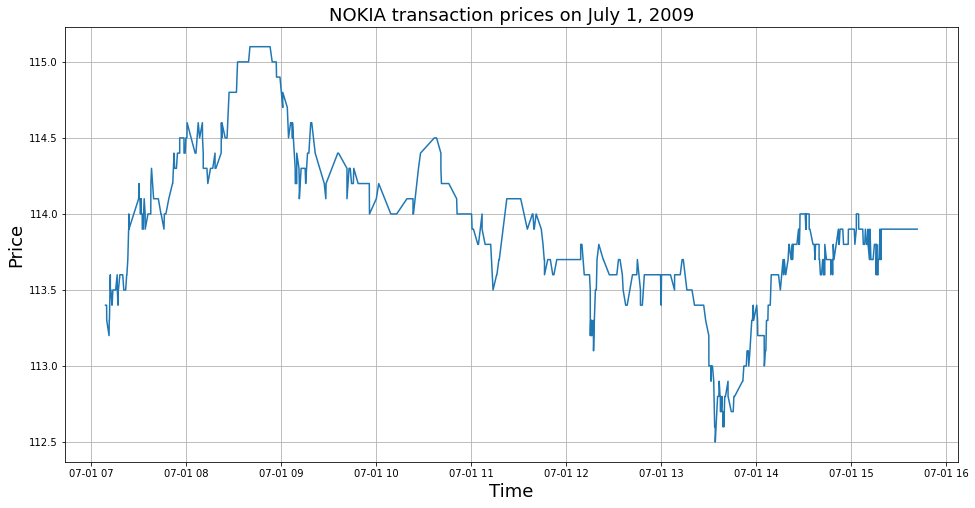

In [24]:
Noki = Data[(Data["#RIC"] == "NOKI.ST") & (Data["Date[G]"] == 20090701) & (Data["Type"] == "Trade")] 
plt.figure(figsize=(16,8))
plt.plot(Noki["DT"], Noki["Price"])
plt.title("NOKIA transaction prices on July 1, 2009", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.grid(True)
plt.show()

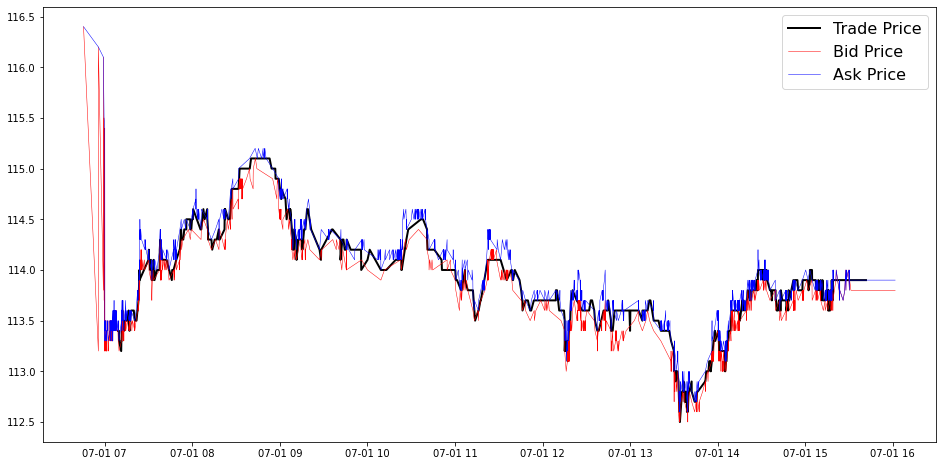

In [25]:
NokiQ = Data[(Data["#RIC"] == "NOKI.ST") & (Data["Date[G]"] == 20090701) & (Data["Type"] == "Quote")]

plt.figure(figsize=(16, 8))
plt.plot(Noki["DT"], Noki["Price"], "k", lw=2, label="Trade Price")
plt.plot(NokiQ[NokiQ["Bid Price"] > 0]["DT"], NokiQ[NokiQ["Bid Price"] > 0]["Bid Price"].dropna(), "r-", lw=0.5, label="Bid Price")
plt.plot(NokiQ[NokiQ["Ask Price"] > 0]["DT"], NokiQ[NokiQ["Ask Price"] > 0]["Ask Price"].dropna(), "b-", lw=0.5, label="Ask Price")
plt.legend(loc="best", fontsize=16)
plt.show()

# Two axes plot

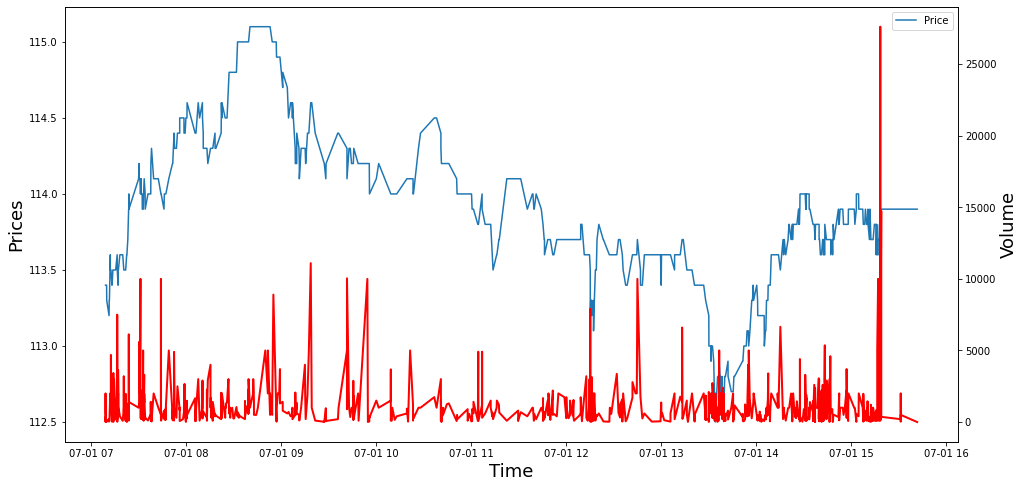

In [26]:
fig, ax1=plt.subplots(figsize=(16, 8))
plt.plot(Noki["DT"], Noki["Price"], label="Price")
plt.xlabel("Time", fontsize=18)
plt.ylabel("Prices", fontsize=18)

plt.legend(loc="best")

ax2 = ax1.twinx()
plt.plot(Noki["DT"], Noki["Volume"], "r-", label="Volume", lw=2)
plt.ylabel("Volume", fontsize=18)

plt.show()

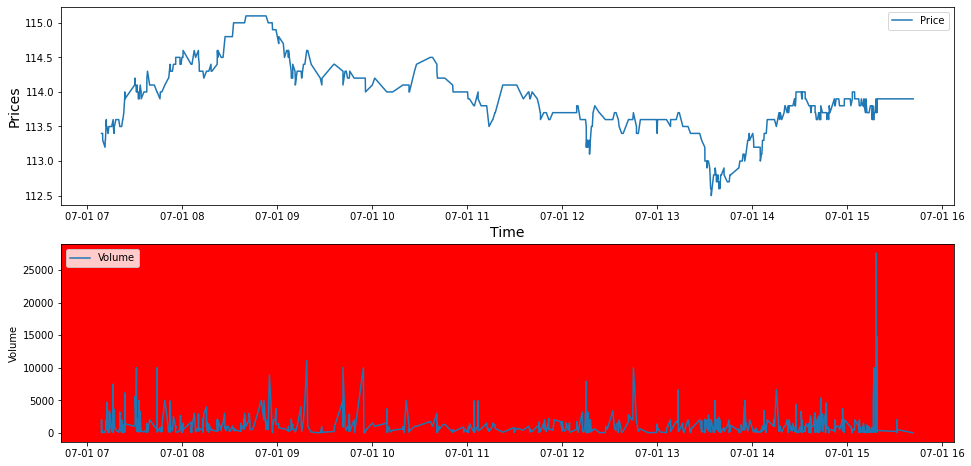

In [27]:
fig= plt.figure(figsize=(16, 8))
ax1 = plt.subplot(211)
plt.plot(Noki["DT"], Noki["Price"], label="Price")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Prices", fontsize=14)
plt.legend()

plt.subplot(212, frameon=True, facecolor="red")
plt.plot(Noki["DT"], Noki["Volume"], label="Volume")
plt.ylabel("Volume")
plt.legend()
plt.show()


# Histogram

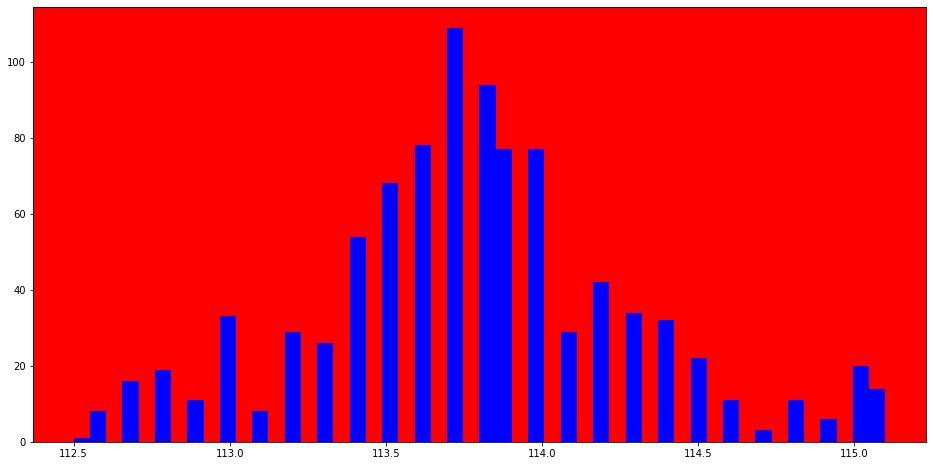

In [28]:
plt.figure(figsize=(16, 8))
plt.subplot(facecolor="red")
plt.hist(Noki["Price"], label="Prices", color="b", bins=50)
plt.show()

# Scatterplot 

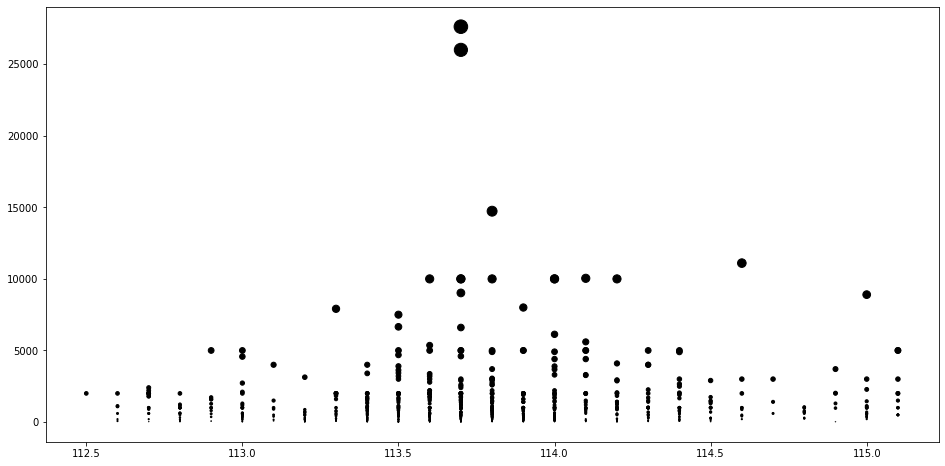

In [29]:
plt.figure(figsize=(16, 8))
plt.scatter(Noki["Price"], Noki["Volume"], marker="o", s=Noki["Volume"]/150, c="black")

# 3-D plots

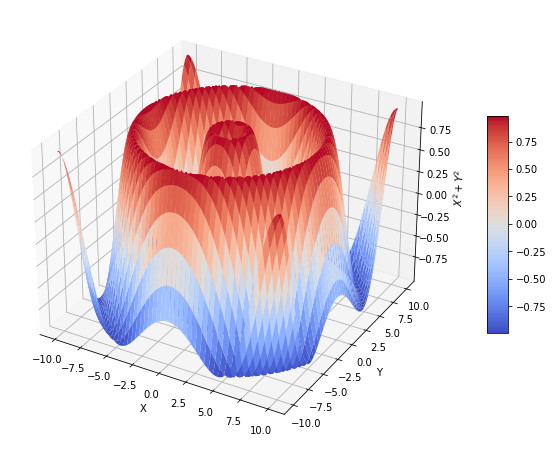

In [30]:
import math
def func_3d(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 8))
ax = fig.gca(projection="3d")

xspace=np.linspace(-10, 10, 100)
yspace=np.linspace(-10, 10, 100)

xspace, yspace=np.meshgrid(xspace, yspace)


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel(r'$X^2+Y^2$')

surf = ax.plot_surface(xspace, yspace, func_3d(xspace, yspace), cmap=cm.coolwarm)

fig.colorbar(surf, shrink=0.5, aspect=10)


In [31]:
Data

,index,#RIC,Date[G],Time[G],GMT Offset,Type,Ex/Cntrb.ID,Price,Volume,Buyer ID,...,No. Buyers,Seller ID,Ask Price,Ask Size,No. Sellers,Qualifiers,Exch Time,DateS,DT,TS
0,0,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009070106:44:59.598514,2009-07-01 06:44:59.598514,2009-07-01 06:44:59.598514
1,1,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,385.00,3868.0,NaN,NaN,NaN,2009070106:44:59.598514,2009-07-01 06:44:59.598514,2009-07-01 06:44:59.598514
2,2,HMb.ST,20090701,06:49:43.089521,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3888.0,NaN,NaN,NaN,2009070106:49:43.089521,2009-07-01 06:49:43.089521,2009-07-01 06:49:43.089521
3,3,HMb.ST,20090701,06:50:27.336043,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4938.0,NaN,NaN,NaN,2009070106:50:27.336043,2009-07-01 06:50:27.336043,2009-07-01 06:50:27.336043
4,4,HMb.ST,20090701,06:50:28.333304,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4688.0,NaN,NaN,NaN,2009070106:50:28.333304,2009-07-01 06:50:28.333304,2009-07-01 06:50:28.333304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237003,291538,VOLVb.ST,20090731,15:31:16.469761,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009073115:31:16.469761,2009-07-31 15:31:16.469761,2009-07-31 15:31:16.469761
1237004,291539,VOLVb.ST,20090731,15:31:16.469761,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,52.75,291057.0,NaN,NaN,NaN,2009073115:31:16.469761,2009-07-31 15:31:16.469761,2009-07-31 15:31:16.469761
1237005,291540,VOLVb.ST,20090731,15:40:02.295482,2,Trade,NaN,52.75,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,CLb c d e f g [ALIAS];144[IRGCOND]; [PRC_QL...,15:40:02.000,2009073115:40:02.295482,2009-07-31 15:40:02.295482,2009-07-31 15:40:02.295482
1237006,291541,VOLVb.ST,20090731,16:00:02.850711,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,0.0,NaN,NaN,NaN,2009073116:00:02.850711,2009-07-31 16:00:02.850711,2009-07-31 16:00:02.850711
